# Generate word clouds from EDS 220 survey responses
## Fall 2022

In [3]:
# import appropriate modules
import pandas as pd
import numpy as np
from os import path
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from io import BytesIO
import requests
figsize = 15
year = '2022'

In [4]:
# Read in survey data
df = pd.read_csv('surveyquestions_EDS220_Fall' + year + '.csv')

In [5]:
# Define column names
df.columns = ['timestamp','data_interested', 'dataprods_excited','level_familiar', 'dataprods_used', 'most_interested', 'most_worried','better_at','missing_question'] # clean column names
df.head()

,timestamp,data_interested,dataprods_excited,level_familiar,dataprods_used,most_interested,most_worried,better_at,missing_question
0,2022/09/19 4:44:32 PM MDT,Satellite-based: land;Other remotely sensed (a...,NaN,Novice: little to no experience,NaN,Working with real environmental datasets,Using Python,Visualizing datasets and using Python,NaN
1,2022/09/19 7:11:41 PM MDT,"Satellite-based: ocean;In situ: station data, ...",Electricity and energy data - I think it is ne...,Novice: little to no experience,NaN,Learning about climate modeling and venturing ...,My coding skills may be lacking to complete th...,I would like to feel comfortable using large d...,NaN
2,2022/09/19 7:33:37 PM MDT,Satellite-based: ocean,NaN,Novice: little to no experience,NaN,Learning how to collect data - only have exper...,No particular worries - mostly concerned about...,Understanding of remote sensing,Nope :)
3,2022/09/19 7:45:42 PM MDT,satellite-based: land,NaN,Novice: little to no experience,NaN,remote sensing,remote sensing,remote sensing,NaN
4,2022/09/20 10:54:34 AM MDT,Other remotely sensed (autonomous sensor/buoy ...,NaN,Intermediate: familiar with one or two datasets,NaN,NaN,NaN,NaN,NaN


In [6]:
# Concatenate responses
dataprods_excited = " ".join(df['dataprods_excited'].dropna().to_list())
dataprods_used = " ".join(df['dataprods_used'].dropna().to_list())
most_interested_text = " ".join(df['most_interested'].dropna().to_list())
most_worried_text = " ".join(df['most_worried'].dropna().to_list())
better_at_text = " ".join(df['better_at'].dropna().to_list())

In [7]:
# Make circular mask
url = 'https://raw.githubusercontent.com/environmental-data-science/ESM_203/master/'
response = requests.get(url + 'data/circle_mask.png')
mask = np.array(Image.open(BytesIO(response.content)))


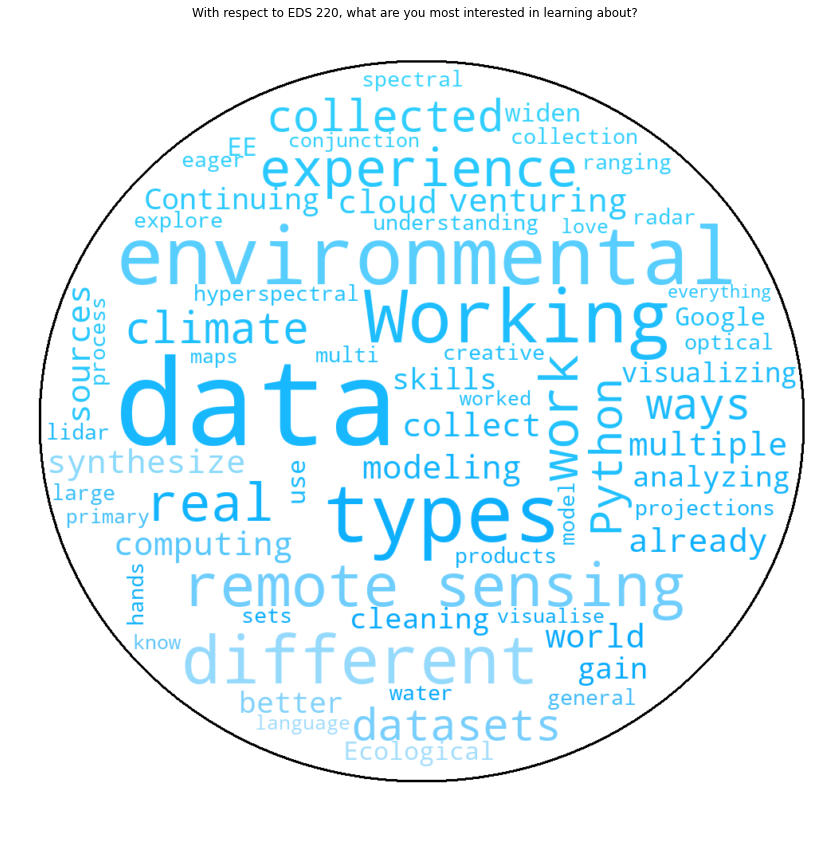

In [8]:
# Plot word cloud: most interested in learning
max_words = 100
stopwords = set(STOPWORDS)

stopwords.update(["interested", "learning",'excited','really','getting','learn','used','using']) # remove question words from answers.

# Generate the wordcloud
wordcloud = WordCloud(
    max_words=max_words,
    mask=mask,
    contour_width=3,
    stopwords=stopwords,
    background_color="white").generate(most_interested_text)

# Use the mask for determining word colors
image_colors = ImageColorGenerator(mask)

# Make the figure
plt.figure(figsize=[figsize,figsize])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('With respect to EDS 220, what are you most interested in learning about?')
plt.axis("off")
plt.show()

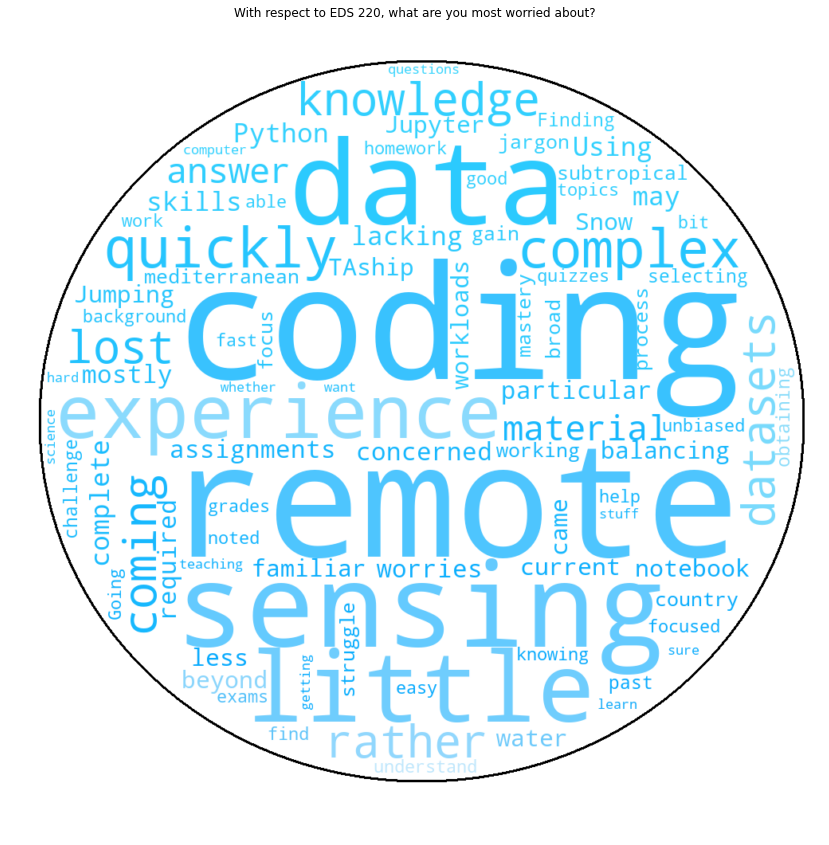

In [9]:
max_words = 100
stopwords = set(STOPWORDS)

stopwords.update(["worried", "learning", "course", "topic", "lack", "will", "much"]) # Remove question words.

response = requests.get(url + 'data/circle_mask.png')
mask = np.array(Image.open(BytesIO(response.content)))

# Generate the wordcloud
wordcloud = WordCloud(
    max_words=max_words,
    mask=mask,
    contour_width=3,
    stopwords=stopwords,
    background_color="white").generate(most_worried_text)

# Use the mask for determining word colors
image_colors = ImageColorGenerator(mask)

# Make the figure
plt.figure(figsize=[figsize,figsize])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('With respect to EDS 220, what are you most worried about?')
plt.axis("off")
plt.show()

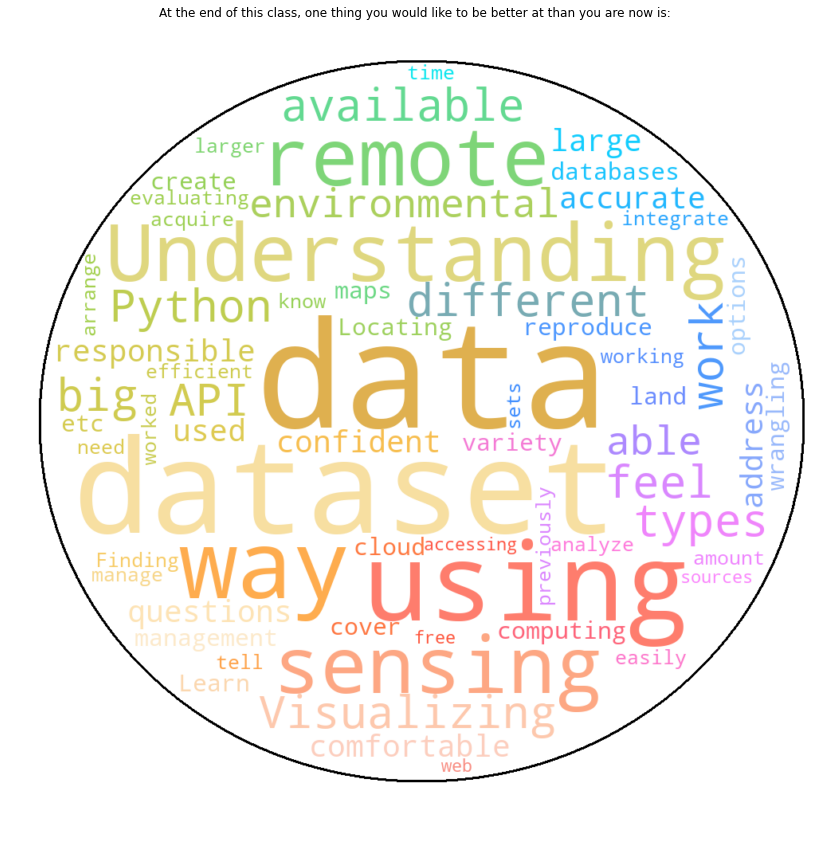

In [10]:
max_words = 100
stopwords = set(STOPWORDS)

stopwords.update(["better"])

response = requests.get(url + 'data/better_mask.png')
mask = np.array(Image.open(BytesIO(response.content)))

wordcloud = WordCloud(
    max_words=max_words,
    mask=mask,
    contour_width=3,
    stopwords=stopwords,
    background_color="white").generate(better_at_text)

image_colors = ImageColorGenerator(mask)

plt.figure(figsize=[figsize,figsize])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('At the end of this class, one thing you would like to be better at than you are now is:')
plt.axis("off")
plt.show()